In [1]:
%load_ext autoreload
%autoreload 2

In [111]:
from hfgtools import *

In [118]:
aqh.Question.unique()

array(['Do you require a wheelchair accessible unit? This question is for data purposes only.',
       'Are you or anyone in your household currently homeless?  This includes currently living in a car, on the street, in an emergency shelter, transitional housing, or currently living in a friend or family members home, or couch surfing? If yes, where are you currently living?',
       'Did someone help you complete this application? If yes, then who?',
       'How did you hear about our wait list opening?  Please fill in the following box with an answer (Ex. Text message, email, Facebook, RegisterGuard, family/friend, etc.)'],
      dtype=object)

In [120]:
list(aqh.loc[(aqh.Preference=='P7') & (aqh.Answer=='Yes'), 'Response'].unique())

['Svdp shelter',
 "I'm living with my ex. I will be on the street at the end of this upcoming January.",
 'Friends house',
 'Eugene, OR',
 '1022 w 4th Ave \nEugene, OR 97402',
 'I am living with my ex. Whether I have a place to go or not, I am required to leave at the end of the upcoming January.',
 'Svdp night shelter',
 'Couch surfing',
 'Staying with adult children and friends on couch.',
 'Residential Treatment at Willamette Family Cheshire',
 'Sherman housing authority',
 'friends',
 'I have a tent up in the Whiteaker community, on the grounds of Alluvium (non-profit charity and church).',
 'Yes, Am in SSDI process, and living with family member as Disabled.',
 'Svdp might shelter',
 'Varies places around Eugene Oregon where I can pitch my tent',
 'Franklin and hilyard ave',
 'Willammette Family',
 'Wherever we can for now',
 'Living with family member',
 'Living with family',
 "I am currently staying on my cousin's couch in Salem but the housing is not permanent",
 'I sleep in my

In [79]:
p8 = reorganizeP8()

In [75]:
p8.loc[p8.P8SCat == "unknown", "Response"].unique()

array(['Chris', '07/26/2022', 'No', 'Diedra', 'Viola', 'diedra',
       'Shirley', 'linz', 'anc', 'Dpn', 'Maclain', 'Tasherra', 'Choice',
       'Nicole0110', 'din', 'Sleeping in my truckerpinan',
       'Section 8 HCV 2022 Waitlist', 'PH 1 bdrm Riverview', 'carol',
       'Living in my mini van', 'dpm'], dtype=object)

In [80]:
p8['P8BCat'].value_counts().rename_axis('who_helped').reset_index(name='counts')

,who_helped,counts
0,Homes For Good,3170
1,Human Services,2264
2,Community Organization,1789
3,Community Members,1634
4,Government Services,848
5,Housing Services,625
6,Health Services,508
7,Unknown,55


In [81]:
p8.loc[p8.P8BCat == "Community Organization", "P8SCat"].unique()

array(['Catholic Community Services', 'ShelterCare',
       'Catholic Charities of Oregon', 'St. Vincent de Paul',
       'Eugene Public Library', 'Lane Community College'], dtype=object)

In [112]:
p9 = reorganizeP9()

In [83]:
p9.loc[p9.P9SCat == "unknown", "Response"].unique()

array(['No', 'na', 'lane', 'no', 'My group home', 'none', 'ACH', 'RSC',
       'Na', 'N/a', 'Wayne Martin', 'Not sure', 'Other agencies', 'Other',
       'Other agency', 'agency', 'Other Agencies advertised', 'Shirley',
       'Etc', 'Leann', 'Jennings', 'Hannah spomer', 'Another applicant',
       'Mary and chandler', 'Mary an chandler', 'RAC', 'dis', 'David',
       'Agency', 'Yes', 'downtown', 'Kim singler', 'DevNW',
       'Mental heath', 'david', 'eldery man', 'Not applicable', 'no.',
       'people', '*', 'EDD', 'gaia', '>', '.', 'E', 'Luci',
       'Resident Meeting', '/', 'MAT program', 'Scot', 'Michele Haga',
       'michele haga', 'barn', 'TREESACAUDELL',
       'Looked it up and it was open.', 'None', 'Gienia Baines', 'Gienia',
       'gienia', 'OREM', 'VA SW alerted', 'child school', 'others',
       'other', 'Electrónico', 'Housing', 'Emaol', 'Ema',
       'Davina Prakash', 'Resource center', 'Samuel Baratta',
       'Mary Wagner', 'SHA', 'Kairos (Tempo)', 'Kairos Tempo',


In [97]:
p9.loc[p9.P9SCat == "Google", "Response"].unique()

array(['Google', 'I check the website waiting',
       'Researching online for safe housing.',
       'Researching online safe housing for victims of domestic violence.',
       'Researching safe housing for domestic violence victims.',
       'Checking website', 'Just my own search', 'Search engine',
       'Researching online for safe housing for domestic violence victims.',
       'Internet search', 'google', 'Google search',
       'My own research in trying to find housing for me and my children due to our current housing situation of not having a permanent and safe place to live.',
       'im looking to move out of colorado i am a domestic violance victim',
       'looking onto the website', 'google search',
       'I found it on a website when I did a google search.',
       'It was on the website when I did a google search.',
       'searched online',
       'On the website that I found from a google search.',
       'On the website when I did a google search.',
       'on a we

In [106]:
p9['P9SCat'].value_counts().rename_axis('how_heard').reset_index(name='counts').head(10)

,how_heard,counts
0,family and friends,6248
1,human services profession,3922
2,Email,3044
3,Homes For Good,1978
4,Facebook,1558
5,website,1230
6,Laurel Hill Center,597
7,Willamette Family,561
8,text message,560
9,ODHS,535


In [115]:
p9['P9BCat'].value_counts().rename_axis('how_heard').reset_index(name='counts')

,how_heard,counts
0,Community Members,9852
1,Human Services,5341
2,Media Communications,3777
3,Homes For Good,2152
4,Government Services,1286
5,Health Services,1264
6,Community Organization,1087
7,Unknown,524
8,Housing Services,401


In [108]:
p9.loc[p9.P9BCat == "Community Organization", "P9SCat"].unique()

array(['homeless center or shelter', 'St. Vincent de Paul',
       'Catholic Community Services', 'ShelterCare', 'Head Start',
       'Eugene Public Library', 'Springfield Eugene Tenant Association',
       'Catholic Charities of Oregon', 'Love Project',
       'Centro Latino Americano', 'Lane Community College'], dtype=object)

In [113]:
p9['P9Cat'].value_counts().rename_axis('how_heard').reset_index(name='counts')

,how_heard,counts
0,Multiple Channels,15233
1,Email,4240
2,Website,2087
3,Social Media,1607
4,Text Message,711
5,Search Engine,532
6,Flyer,361
7,Word of Mouth,292
8,News,247
9,Office Visit,207


In [102]:
p9.loc[p9.P9Cat == "Multiple Channels", "P9BCat"].unique()

array(['Community Members', 'Human Services', 'Health Services',
       'Government Services', 'Homes For Good', 'Housing Services',
       'Community Organization', 'Unknown', 'Media Communications'],
      dtype=object)

In [114]:
p9.loc[p9.P9Cat == "Word of Mouth", "Response"].unique()

array(['Heard from friend.', 'Word of mouth', 'word of mouth',
       'I heard from you through my therapy with José Mora Santana',
       'WE heard about the program through a work source housing specialist Gretchen Stupke',
       'Olivia Goodheart', 'Word of mouth.',
       'I heard about the wait list from Senior and Disable Services',
       'Olivia Goodheart from the WIOA program',
       "Visiting aforementioned elderly dad and met a very nice woman @ the hotel where I'm staying for my two day visit. Happened to meet her the evening before this list opened. Felt like it was a sign. She informed me it may be helpful that we are both veterans.",
       'I heard about homes for good from a girlfriend about five day ago.',
       'Friend, word of mouth', 'Word of Mouth',
       'I was in homes for good talking to the receptionist and mentioned it.',
       'mouth', 'Word o mouth', 'I heard from a friend',
       'Neighbor, word of mouth', 'Heard from a friend word of mouth',
       

In [67]:
aqh[(aqh.KeyApplication.isin(aqh[aqh.Response == 'no'].KeyApplication.unique())) & (aqh.Preference=='P8')]

,QuestionID,KeyApplication,Question,Preference,Answer,Response,TSModified,TSCreated
6238,2083,5421657,Did someone help you complete this application...,P8,No,no,2022-07-26 13:07:16,2022-07-26 13:07:16
6422,2083,5421720,Did someone help you complete this application...,P8,No,no,2022-07-26 13:08:45,2022-07-26 13:08:45
7194,2083,5422008,Did someone help you complete this application...,P8,No,NaN,2022-07-26 13:15:50,2022-07-26 13:15:50
10402,2083,5423297,Did someone help you complete this application...,P8,No,no,2022-07-26 13:57:49,2022-07-26 13:57:49
10590,2083,5423367,Did someone help you complete this application...,P8,No,no,2022-07-26 13:59:57,2022-07-26 13:59:57
...,...,...,...,...,...,...,...,...
77386,2083,5467743,Did someone help you complete this application...,P8,No,no,2022-08-06 17:06:09,2022-08-06 17:06:09
79826,2083,5469486,Did someone help you complete this application...,P8,No,no,2022-08-07 19:11:50,2022-08-07 19:11:50
81294,2083,5470510,Did someone help you complete this application...,P8,No,no,2022-08-08 11:16:36,2022-08-08 11:16:36
85942,2083,5472729,Did someone help you complete this application...,P8,Yes,lindsay weiss,2022-08-08 17:06:49,2022-08-08 17:06:49


In [33]:
who['Detailed Name'].unique()

array(['Unknown ', 'Community Member', 'Senior Disability Service Staff',
       'Homes for Good Staff', 'Connected Lane County Staff ',
       'Sponsors Inc Staff', 'Lane County Staff Member',
       'Catholic Community Services Staff', 'ODHS Staff',
       'Sheltercare Staff', 'Laurel Hill Center Staff',
       'Lane Community College Staff ', 'Serenity Lane Staff',
       'HIV Alliance Staff ', 'Emergence Staff',
       'Pearl Buck Center Staff', 'Options Staff ',
       'Smart Living Learning and Earning with Autism Staff'],
      dtype=object)

In [70]:
df.loc[df.P9SCat == "unknown", "Response"].unique()

array(['No', 'na', 'lane', 'no', 'My group home', 'none', 'ACH', 'RSC',
       'Na', 'N/a', 'Wayne Martin', 'Not sure', 'Shirley', 'Etc', 'Leann',
       'Jennings', 'Hannah spomer', 'Mary and chandler',
       'Mary an chandler', 'RAC', 'dis', 'David', 'Yes', 'downtown',
       'Kim singler', 'DevNW', 'Mental heath', 'david', 'eldery man',
       'Not applicable', 'no.', 'people', '*', 'EDD', 'gaia', '>', '.',
       'E', 'Luci', 'Resident Meeting', '/', 'MAT program', 'Scot',
       'aquaintance',
       'Ian McBride n Savannah who runs OPPERTUNITY VILLAGE',
       'V.  Hey girl r u going to the clinic', 'Michele Haga',
       'michele haga', 'barn', 'TREESACAUDELL',
       'Looked it up and it was open.', 'None', 'Gienia Baines', 'Gienia',
       'gienia', 'OREM', 'VA SW alerted', 'child school', 'Electrónico',
       'Housing', 'Emaol', 'Ema', 'Davina Prakash', 'Resource center',
       'Samuel Baratta', 'Mary Wagner', 'SHA', 'Kairos (Tempo)',
       'Kairos Tempo', 'Kiros Tempo', 

In [147]:
p9.loc[p9.P9SCat == "unknown", "Response"].unique()

array([], dtype=object)

In [64]:
who[who.name.isin(['Kairos Tempo'])]

,name,counts,General Name,Detailed Name


In [131]:
[x for x in ['Michelle Sario', 'Gloria Estrada',
'Hannah Spomer',
'Shirley Eastman',
'RAC',
'RCO',
'Albert Nash',
'YH',
'Kim Singler',
'Tina Hogin',
'Kim Thorn'] if x not in who.name.unique()]

['Hannah Spomer', 'RAC', 'RCO', 'YH', 'Kim Singler', 'Tina Hogin']

In [101]:
p8 = reorganizeP8()

In [102]:
p8['P8BCat'].value_counts().rename_axis('who_helped').reset_index(name='counts')

,who_helped,counts
0,Community Organization,3999
1,Homes For Good,3151
2,Community Member,1657
3,Human Services Profession,1482
4,Housing Specialist,549
5,Unknown,55


In [103]:
sorted(list(p8.loc[p8.P8BCat == "Unknown", "Response"].unique()))

['07/26/2022',
 'CLaire Hutton ecobeanfabric@yahoo.com 541-972-9288',
 'Choice',
 'Chris',
 'Claire Hutton \necobeanfabric@yahoo.com\n541-972-9288',
 'Claire Hutton  ecobeanfabric@yahoo.com 541-972-9288',
 'Claire Hutton ecobeanfabric@yahoo.com',
 'Claire Hutton ecobeanfabric@yahoo.com  541-972-9288',
 'Claire Hutton ecobeanfabric@yahoo.com 541-972-9288',
 'Claire Hutton.  ecobeanfabric@yahoo.com. 541-972-9288',
 'Claire Hutton. ecobeanfabric@yahoo.com    541-972-9288',
 'Claire Hutton. ecobeanfabric@yahoo.com   541-972-9288',
 'Diedra',
 'Dpn',
 'Living in my mini van',
 'Maclain',
 'Nicole0110',
 'No',
 'PH 1 bdrm Riverview',
 'Section 8 HCV 2022 Waitlist',
 'Shirley',
 'Sleeping in my truckerpinan',
 'Tasherra',
 'Viola',
 'anc',
 'carol',
 'diedra',
 'din',
 'dpm',
 'linz']

In [3]:
import matplotlib.pyplot as plt

In [4]:
inpath = r'T:\DCProjects\Support\Lane\HfG\DataFromThem'

In [5]:
# oa - online applications
oa = pd.read_csv(inpath + '\\OnlineApplications.csv')

In [26]:
oa.columns

Index(['KeyApplication', 'AgencyID', 'WLNumber', 'WLName', 'Language',
       'NameFirst', 'NameMiddle', 'NameLast', 'MailAddress1', 'MailAddress2',
       'MailCity', 'MailState', 'MailZIP', 'MailZIP4', 'LegalAddress1',
       'LegalAddress2', 'LegalCity', 'LegalState', 'LegalZIP', 'LegalZIP4',
       'Phone', 'MobilePhone', 'OtherContact', 'OtherType', 'SSN', 'DOB',
       'EmancipatedMinor', 'Sex', 'Disabled', 'Race', 'Ethnicity',
       'HouseholdSize', 'HouseholdMinors', 'IncomeAnnual', 'IncomeChecking',
       'IncomeSavings', 'IncomeInvestments', 'IncomeRealEstate', 'IncomeOther',
       'AssetsChecking', 'AssetsSavings', 'AssetsInvestments',
       'AssetsRealEstate', 'AssetsOther', 'QuestionIDs', 'OptOut92006',
       'PreviousAgencyID', 'TSModified', 'TSCreated', 'ApplicationTS',
       'eAgree', 'AddressValidation', 'LotteryNumber', 'Citizenship',
       'OptOutSSN', 'AccountEmail'],
      dtype='object')

In [32]:
oa['Age'] = oa['DOB'].apply(lambda x: calculate_age(x))

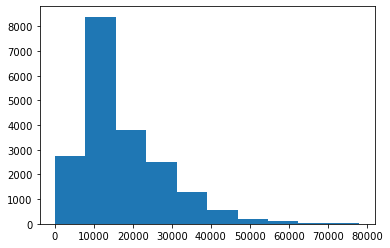

In [214]:
plt.hist(oa.loc[(oa.IncomeAnnual != 0) & (oa.IncomeAnnual < 80000), 'IncomeAnnual']);

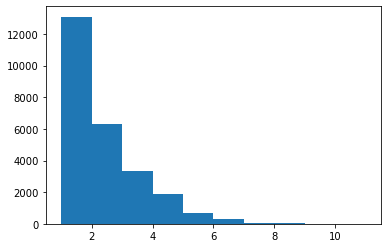

In [221]:
plt.hist(x=oa['HouseholdSize']);

In [229]:
len(oa.LegalState.value_counts().index)

44

In [226]:
oa.LegalZIP.value_counts()

97402    7181
97401    3493
97477    3416
97478    1782
97404    1608
         ... 
97462       1
85225       1
44052       1
30014       1
7104        1
Name: LegalZIP, Length: 548, dtype: int64

In [225]:
oa.HouseholdMinors.value_counts()

0    16426
1     4624
2     2868
3     1261
4      336
5      163
6       22
7        9
8        5
9        4
Name: HouseholdMinors, dtype: int64

In [224]:
oa.EmancipatedMinor.value_counts()

0    25710
1        8
Name: EmancipatedMinor, dtype: int64

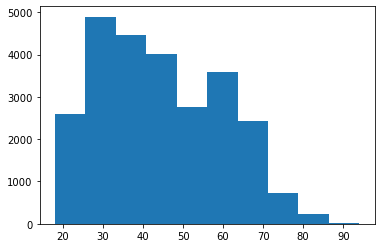

In [215]:
plt.hist(x=oa['Age']);

In [199]:
oa['Age'].value_counts()

35    760
38    740
28    684
36    667
33    656
     ... 
88      7
87      6
85      4
94      3
93      1
Name: Age, Length: 73, dtype: int64

In [197]:
oa['Language'].value_counts()

eng    25683
spa       35
Name: Language, dtype: int64

In [159]:
oa.shape

(25718, 56)

In [158]:
len(oa.KeyApplication.unique())

25718

In [37]:
oa.loc[oa.KeyApplication==5419013, ['LegalAddress1','LegalAddress2', 'LegalCity', 'LegalState', 'LegalZIP', 'LegalZIP4']]

,LegalAddress1,LegalAddress2,LegalCity,LegalState,LegalZIP,LegalZIP4
0,1071 FAIRFIELD AVE,APT 100,EUGENE,OR,97402,2063.0


In [36]:
oa.loc[oa.KeyApplication==5419013, ['HouseholdSize', 'HouseholdMinors', 'PreviousAgencyID', 'Citizenship']]

,HouseholdSize,HouseholdMinors,PreviousAgencyID,Citizenship
0,3,1,NaN,EC


In [8]:
os.listdir(inpath)

['ApplicantIncome.csv',
 'ApplicationContacts.csv',
 'ApplicationMembers.csv',
 'ApplicationQuestionHistory.csv',
 'Codes added via KEY LCOG WaitlistConnect2022_Draft_D20221201 (003).xlsx',
 'Dashboard visual with RA Added.pptx',
 'HowDidYouHear.xlsx',
 'OnlineApplications.csv']

In [9]:
# applicant income
ai = pd.read_csv(inpath + '\\ApplicantIncome.csv')

In [27]:
ai.loc[ai.KeyApplication==5419013, ['KeyIncome', 'Amount', 'HowOften']]

,KeyIncome,Amount,HowOften
0,6471877,3500.0,Monthly


In [28]:
3500*12

42000

In [10]:
# application contacts
ac = pd.read_csv(inpath + '\\ApplicationContacts.csv')

In [238]:
ac.head(3)

,KeyContact,KeyApplication,Name,StreetAddress,City,State,ZIP,PhoneNumber,CellNumber,Email,...,ReasonTermination,ReasonEviction,ReasonLatePayment,ReasonRecertification,ReasonChangeInLeaseTerms,ReasonChangeInHouseRules,ReasonOther,ReasonOtherDetail,TSModified,TSCreated
0,786912,5419064,Carol Post,1367 Brookhaven Circle,Toccoa,GA,30577,(706) 779-3359,NaN,cpost@bellsouth.net,...,0,0,0,0,0,0,0,NaN,2022-07-26 12:10:03,2022-07-26 12:10:03
1,786916,5419158,GIANNA N SANDERS,1642 Water St,Springfield,OR,97477,(541) 228-2001,NaN,hellsangel459335@msn.com,...,0,0,0,0,0,0,1,For any help or if you cannot reach me,2022-07-26 12:13:15,2022-07-26 12:13:15
2,786917,5419159,Carl Davis,318 Grizzly Ave,Eugene,OR,97404,(503) 741-9768,(503) 741-9768,cdavisii@gmail.com,...,0,0,0,0,0,0,0,NaN,2022-07-26 12:13:17,2022-07-26 12:13:17


In [17]:
ac.columns

Index(['KeyContact', 'KeyApplication', 'Name', 'StreetAddress', 'City',
       'State', 'ZIP', 'PhoneNumber', 'CellNumber', 'Email', 'Relationship',
       'ReasonEmergency', 'ReasonUnableToContact', 'ReasonTermination',
       'ReasonEviction', 'ReasonLatePayment', 'ReasonRecertification',
       'ReasonChangeInLeaseTerms', 'ReasonChangeInHouseRules', 'ReasonOther',
       'ReasonOtherDetail', 'TSModified', 'TSCreated'],
      dtype='object')

In [30]:
ac.loc[ac.KeyApplication==5419013, 'Name']

Series([], Name: Name, dtype: object)

In [11]:
# application members
am = pd.read_csv(inpath + '\\ApplicationMembers.csv')

In [19]:
am.columns

Index(['KeyMember', 'KeyApplication', 'NameLast', 'NameMiddle', 'NameFirst',
       'SSN', 'DOB', 'Sex', 'Disabled', 'Relationship', 'Citizenship', 'Race',
       'Ethnicity'],
      dtype='object')

In [189]:
am['Age'] = am['DOB'].apply(lambda x: calculate_age(x))

In [192]:
am['Age'].value_counts()

1     1299
4     1276
2     1258
3     1122
6     1119
      ... 
88       9
87       6
85       4
94       3
93       1
Name: Age, Length: 91, dtype: int64

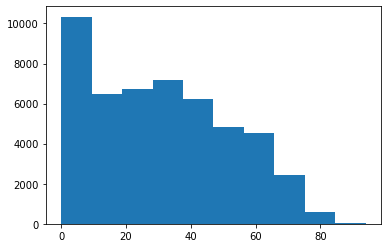

In [218]:
plt.hist(x=am['Age']);

In [193]:
am['Sex'].value_counts()

F    29022
M    20355
Name: Sex, dtype: int64

In [194]:
am['Disabled'].value_counts()

0    34796
1    14581
Name: Disabled, dtype: int64

In [195]:
am['Race'].value_counts()

1            36615
2             3140
6             2807
3             1462
1,3            991
             ...  
1,4g,6           1
3,1,2            1
1,2,4b           1
1,2,3,5,6        1
4,1,2,6          1
Name: Race, Length: 131, dtype: int64

In [196]:
am['Ethnicity'].value_counts()

0    42013
1     7364
Name: Ethnicity, dtype: int64

In [185]:
datetime.strptime(am.DOB.values[0], '%Y-%m-%d')

datetime.datetime(1988, 12, 4, 0, 0)

In [141]:
am.Citizenship.unique()

array(['EC', 'EN', 'IN', 'PV', 'IC', 'ND', nan], dtype=object)

In [33]:
# application question history
aqh = pd.read_csv(inpath + '\\ApplicationQuestionHistory.csv')

In [21]:
aqh.columns

Index(['QuestionID', 'KeyApplication', 'Question', 'Preference', 'Answer',
       'Response', 'TSModified', 'TSCreated'],
      dtype='object')

In [161]:
len(aqh.KeyApplication.unique())

25718

In [34]:
howheard = aqh[aqh.Preference=='P9']

In [175]:
howheard.Answer.unique()

array(['Yes', 'No'], dtype=object)

In [37]:
howheard.loc[:,'Response'] = howheard.copy()['Response'].str.capitalize()

In [38]:
howheard.Response.value_counts()

Email                                      2757
Friend                                     2306
Facebook                                   1148
Family                                     1092
Case manager                                800
                                           ... 
Ive been receving emails                      1
I got a message alert sent to my phone.       1
Sibling                                       1
Willamette families                           1
Beth johnson                                  1
Name: Response, Length: 2958, dtype: int64

In [172]:
hhout = howheard.Response.value_counts().rename_axis('how').reset_index(name='counts')

In [173]:
hhout.to_csv(r'T:\DCProjects\Support\Lane\HfG\how_heard.csv', index=False)

In [146]:
aqh.Preference.unique()

array(['P5', 'P7', 'P8', 'P9'], dtype=object)

In [96]:
list(aqh.loc[(aqh.Preference=='P9') & (aqh.Answer=='Yes'), 'Response'].unique())

['Homes for Good email',
 'Email',
 'Email from Homes For Good Email Subscription',
 'Work force',
 'Homes For Good Email Subscription',
 'Family / Friend',
 'affordablehousingonline.com',
 'Lane workforce',
 'A reddit post in the Eugene subreddit.',
 'Friend',
 'Sister',
 'Facebook',
 'Have had rent help from home for goods and seen this was going to happen weeks ago so I set many alarms and reminders to make sure I could apply.',
 'Housing office at Cheshire Residential',
 'Website',
 'Family',
 'mom',
 'Email.',
 'Email, Disability Advocacy List',
 'Email to my mom',
 'counselor',
 'Willamette family',
 'Womenspace',
 'Treatment',
 'Online',
 'Email from Homes for Good',
 'friends',
 'Lane County',
 'Email notification from Homes For Good.',
 'family',
 'My homes for good worker',
 'Counselor for WF',
 'I received an email  we are currently living in a 2 bedroom unit at this complex paying a reduced market rate',
 'St. Vincent de Paul',
 'Homes for good',
 'Homes for Good website',


In [72]:
out = df[df.P8BCat == "Unknown"]["Response"].value_counts().rename_axis('name').reset_index(name='counts')

In [73]:
out.to_csv(r'T:\DCProjects\Support\Lane\HfG\who_helped_others.csv', index=False)

In [13]:
# how did you hear
hh = pd.read_excel(inpath + '\\HowDidYouHear.xlsx')

In [157]:
hh.ValueToConvertTo.value_counts()

Lane County                                     14
Homes for Good                                  13
State of Oregon                                  5
Looking Glass                                    2
St. Vincent de Paul                              2
                                                ..
Cornerstone Community Housing                    1
Family/Friends                                   1
TV News                                          1
Veterans Administration (VA)                     1
Springfield Eugene Tenant Association (SETA)     1
Name: ValueToConvertTo, Length: 95, dtype: int64